# Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from osgeo import gdal
import xarray as xr
from scipy.io import loadmat

# Functions and constants

In [2]:
def cartesian_to_polar(x,y,thetaunit='rad'):
    r = (x**2+y**2)**0.5
    theta = np.arctan2(y,x)
    if thetaunit=='rad':
        theta = theta
    elif thetaunit=='deg':
        theta = theta*180/np.pi
    return r,theta

In [3]:
def xyz_geotiff(img):
    band = img.GetRasterBand(1)
    z = np.flipud(band.ReadAsArray()).T
    width = img.RasterXSize
    height = img.RasterYSize
    gt = img.GetGeoTransform()
    minx = gt[0]
    miny = gt[3] + width*gt[4] + height*gt[5]
    maxx = gt[0] + width*gt[1] + height*gt[2]
    maxy = gt[3]
    lon = np.linspace(minx,maxx,width)
    lat = np.linspace(miny,maxy,height)
    return lon,lat,z

# Read data

### Spreadsheets

In [4]:
data_spreadsheet = pd.read_csv('TableS2.csv')
h_spreadsheet    = data_spreadsheet['Large Height (m)']
w_spreadsheet    = data_spreadsheet['Large Width (m)']

### GeoTiff files

In [5]:
data_geotiff = gdal.Open('output_AW3D30.tif')
lon_geotiff,lat_geotiff,z_geotiff = xyz_geotiff(data_geotiff)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


### NetCDF files

In [6]:
data_netcdf = xr.open_dataset('e_era5-land_moda_sfc_20200101-20200131.nc')
lon_netcdf  = data_netcdf.longitude
lat_netcdf  = data_netcdf.latitude
e_netcdf    = data_netcdf.e[0]

### MAT-files

In [7]:
data_mat = loadmat('seamount.mat')
x_mat    = np.ndarray.flatten(data_mat['x'])
y_mat    = np.ndarray.flatten(data_mat['y'])
z_mat    = np.ndarray.flatten(data_mat['z'])

# Analysis

In [8]:
x = np.linspace(0,1)
y = np.linspace(-1,3)
r_rad,a_rad = cartesian_to_polar(x,y)
r_deg,a_deg = cartesian_to_polar(x,y,'deg')

# Plots

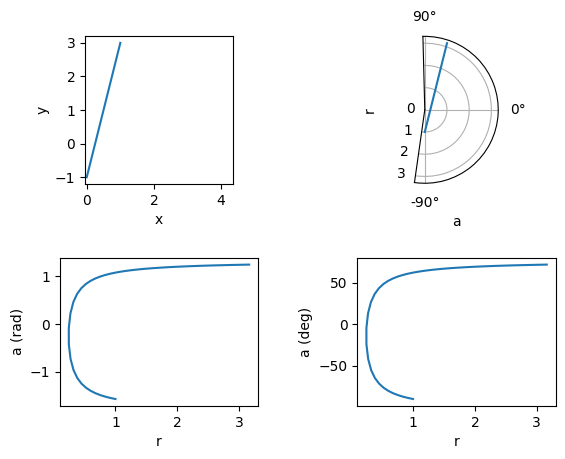

In [9]:
plt.subplot(221)
plt.plot(x,y)
plt.axis('square')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(222,projection='polar')
plt.plot(a_rad,r_rad)
plt.axis('square')
plt.xlabel('a')
plt.ylabel('r')

plt.subplot(223)
plt.plot(r_rad,a_rad)
plt.xlabel('r')
plt.ylabel('a (rad)')

plt.subplot(224)
plt.plot(r_deg,a_deg)
plt.xlabel('r')
plt.ylabel('a (deg)')

plt.subplots_adjust(hspace=0.5,wspace=0.5)

Text(0, 0.5, 'w (m)')

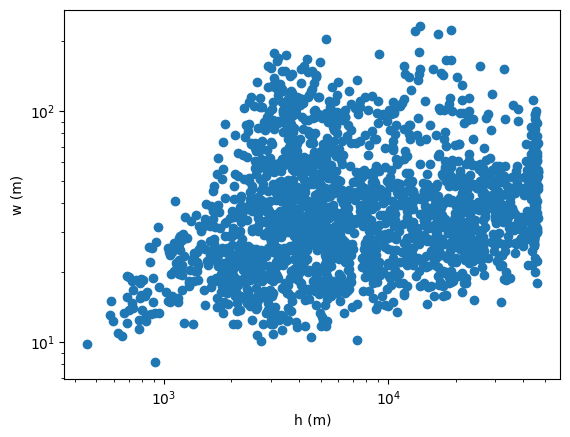

In [10]:
plt.scatter(w_spreadsheet,h_spreadsheet)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h (m)')
plt.ylabel('w (m)')

Text(0, 0.5, 'y ($\\degree$)')

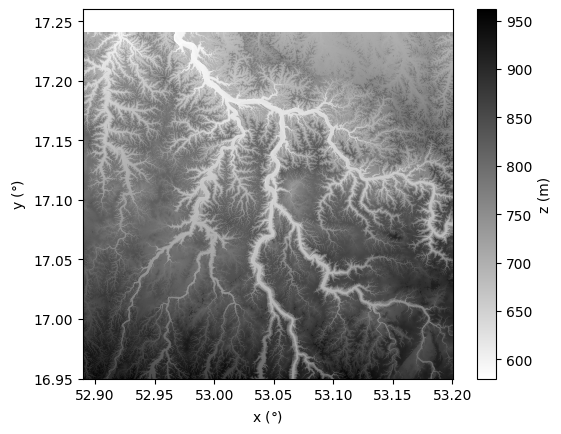

In [11]:
plt.pcolor(lon_geotiff,lat_geotiff,z_geotiff.T,cmap='binary')
plt.axis('square')
plt.colorbar(label='z (m)')
plt.xlabel('x ($\\degree$)')
plt.ylabel('y ($\\degree$)')

Text(0, 0.5, 'y ($\\degree$)')

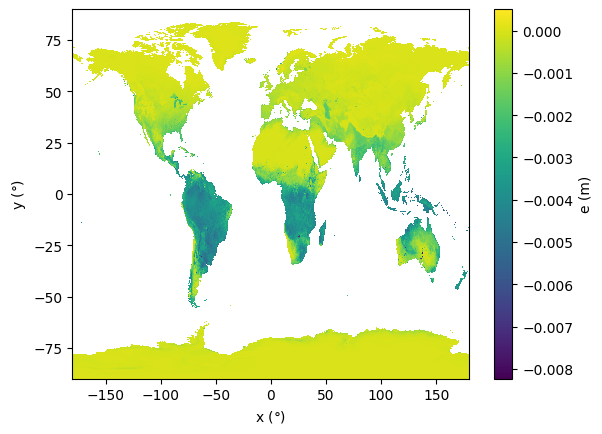

In [12]:
plt.pcolormesh(lon_netcdf,lat_netcdf,e_netcdf)
plt.colorbar(label='e (m)')
plt.xlabel('x ($\\degree$)')
plt.ylabel('y ($\\degree$)')

Text(0, 0.5, 'y ($\\degree$)')

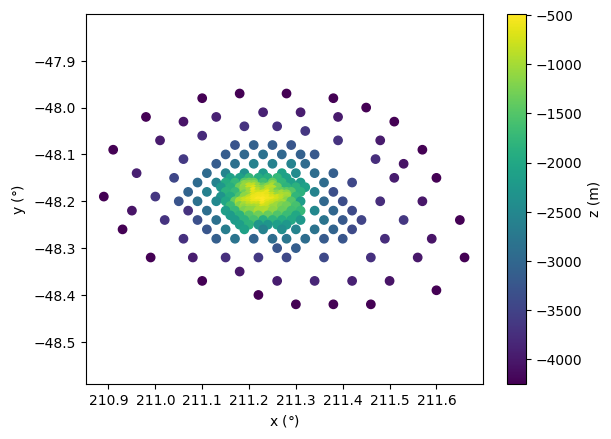

In [13]:
plt.scatter(x_mat,y_mat,c=z_mat)
plt.axis('equal')
plt.colorbar(label='z (m)')
plt.xlabel('x ($\\degree$)')
plt.ylabel('y ($\\degree$)')